# Introduction to Machine Learning

## Decision Trees

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
%matplotlib inline

In [4]:
from IPython.display import SVG
from IPython.display import Image
from graphviz import Source
from IPython.display import display

## Дерево решений в реальной жизни


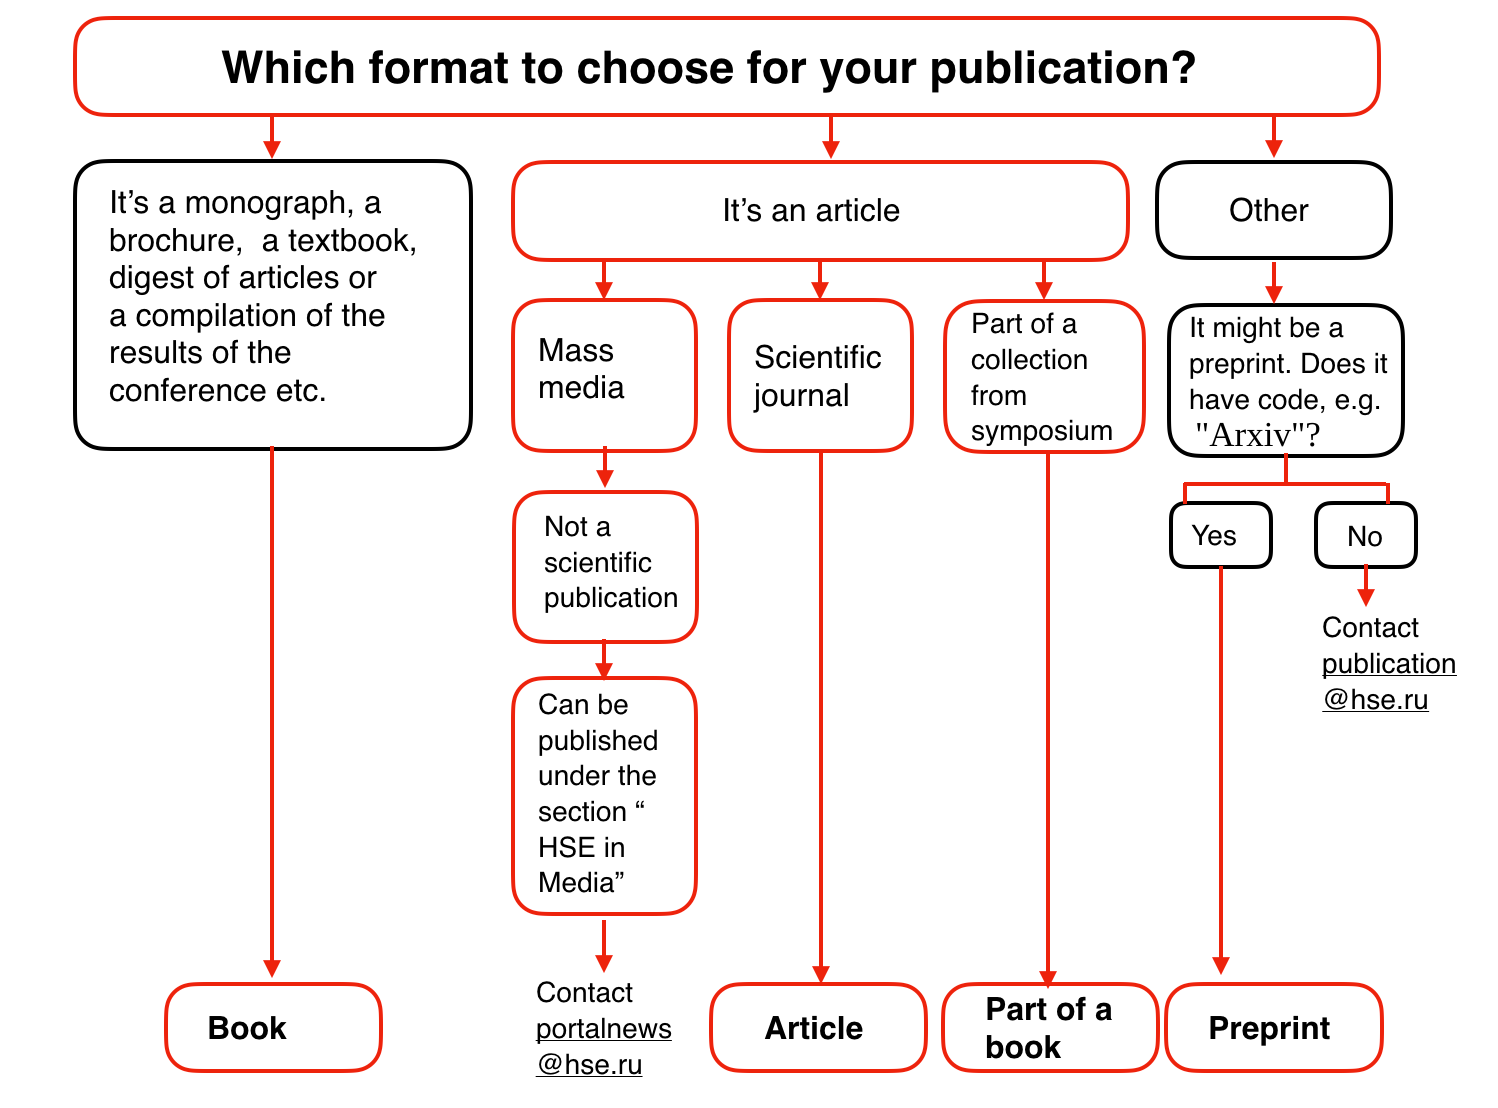

In [6]:
Image(filename="topic3_hse_instruction.png")

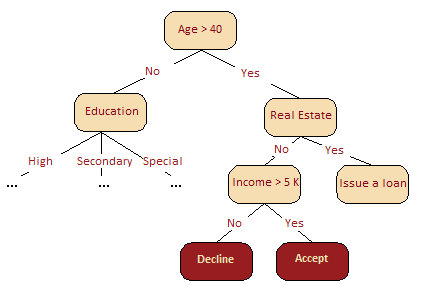

In [7]:
Image(filename="credit_scoring_toy_tree_english.png")

## Synthetic data

In [9]:
data = pd.DataFrame(
    {
        "X_1": [1, 1, 1, 0, 0, 0, 0, 1],
        "X_2": [0, 0, 0, 1, 0, 0, 0, 1],
        "Y": [1, 1, 1, 1, 0, 0, 0, 0]
    }
)

In [10]:
data

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [11]:
tree_clf = tree.DecisionTreeClassifier(criterion="entropy")

In [12]:
X = data[["X_1", "X_2"]]
y = data["Y"]

In [14]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [15]:
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

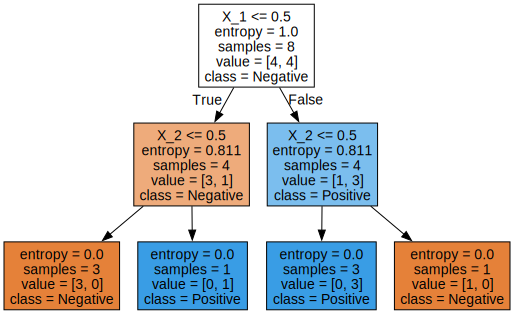

In [17]:
graph = Source(
    tree.export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=list(X),
        class_names=["Negative", "Positive"],
        filled=True
    )
)

display(SVG(graph.pipe(format="svg")))

## Titanic example

In [18]:
titanic_data = pd.read_csv("titanic/train.csv")

In [19]:
titanic_data.shape

(891, 12)

In [20]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [21]:
X = titanic_data.drop(["PassengerId", "Survived", "Ticket", "Name", "Cabin"], axis=1)
y = titanic_data["Survived"]

In [22]:
tree_clf = tree.DecisionTreeClassifier(criterion="entropy")

In [23]:
tree_clf.fit(X, y)

ValueError: could not convert string to float: 'male'

In [24]:
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [25]:
X = pd.get_dummies(X)

In [26]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500       False      True       False   
1       1  38.0      1      0  71.2833        True     False        True   
2       3  26.0      0      0   7.9250        True     False       False   
3       1  35.0      1      0  53.1000        True     False       False   
4       3  35.0      0      0   8.0500       False      True       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True

In [27]:
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

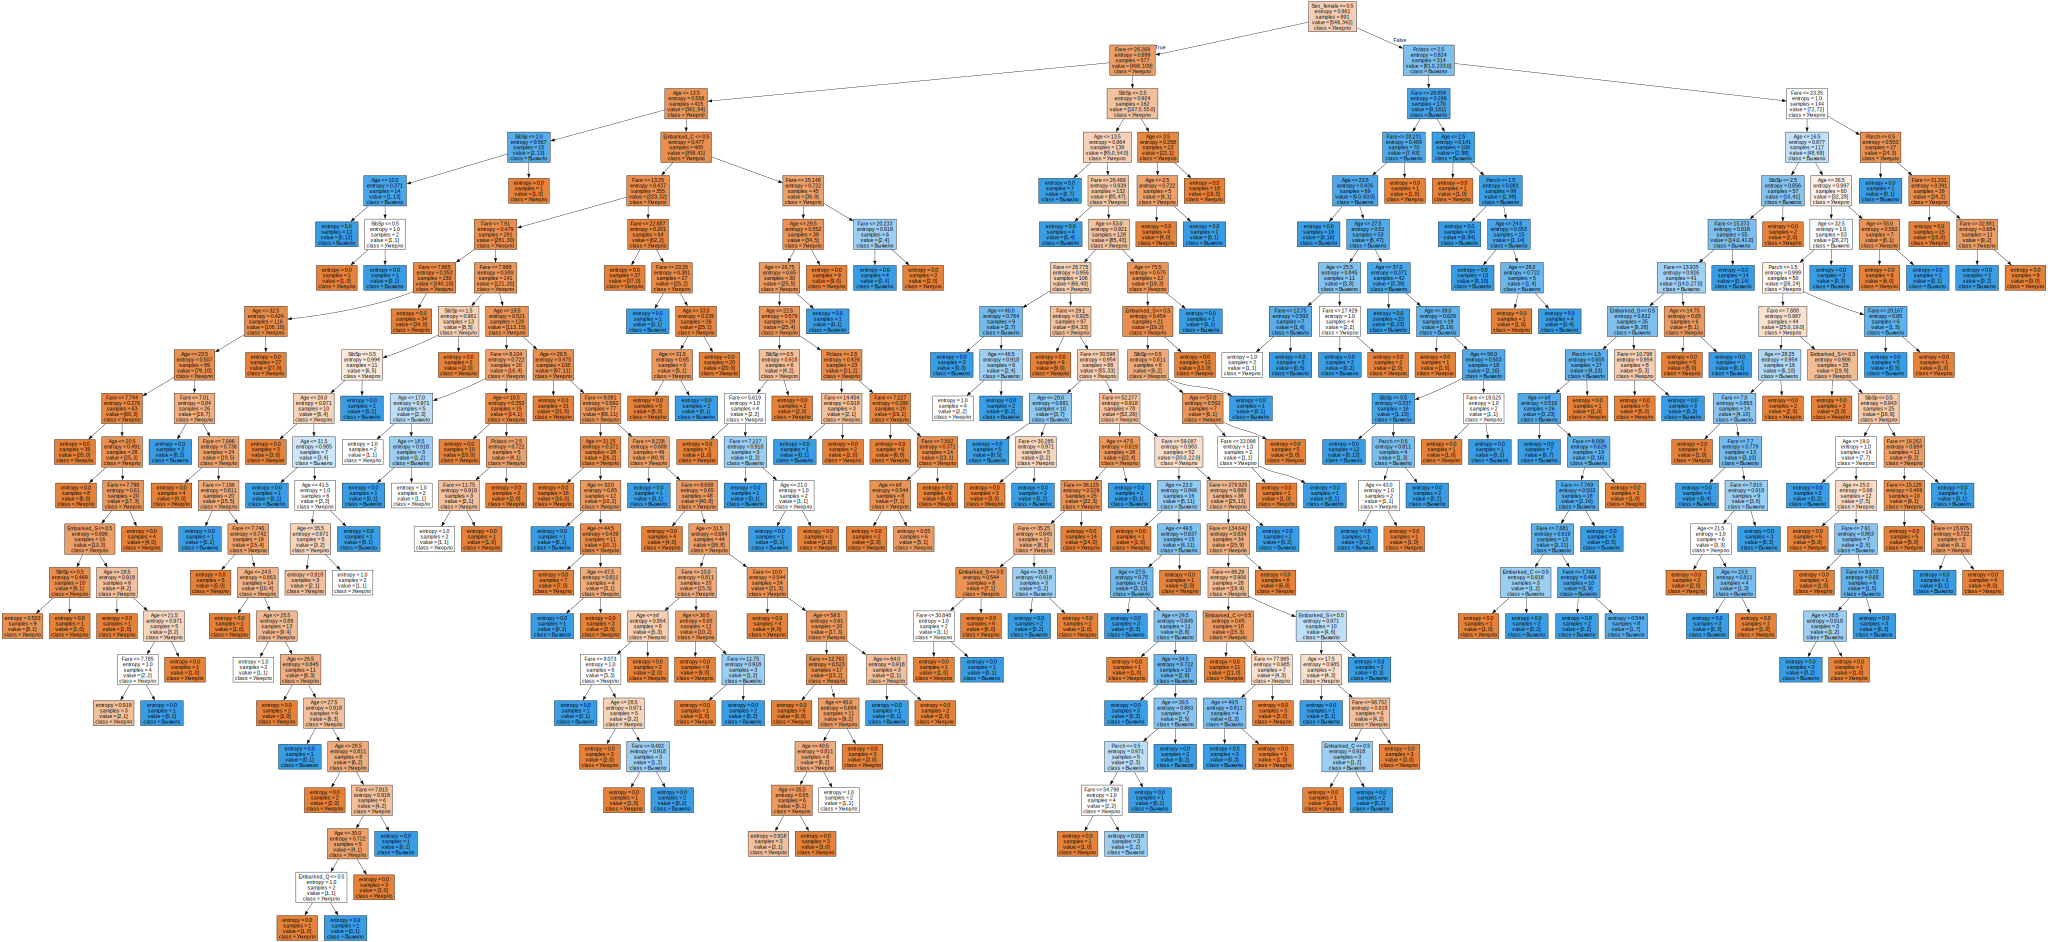

In [28]:
graph = Source(
    tree.export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=list(X),
        class_names=["Умерло", "Выжило"],
        filled=True
    )
)

display(SVG(graph.pipe(format="svg")))

## Параметры модели

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [32]:
X_train.shape, X_test.shape

((596, 10), (295, 10))

In [33]:
tree_clf.score(X, y)

0.9820426487093153

In [34]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
tree_clf.score(X_train, y_train)

0.9865771812080537

In [36]:
tree_clf.score(X_test, y_test)

0.7694915254237288

In [37]:
tree_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [38]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
tree_clf.score(X_train, y_train)

0.8573825503355704

In [40]:
tree_clf.score(X_test, y_test)

0.7932203389830509

In [41]:
scores_data = pd.DataFrame()

In [42]:
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    tmp_df = pd.DataFrame({"max_depth": [max_depth], "train_score": [train_score], "test_score": [test_score]})

    scores_data = pd.concat([scores_data, tmp_df])


In [43]:
scores_data.head()

max_depth  train_score  test_score
0          1     0.805369    0.749153
0          2     0.805369    0.749153
0          3     0.840604    0.769492
0          4     0.857383    0.793220
0          5     0.857383    0.789831

In [45]:
scores_data = pd.melt(
    scores_data,
    id_vars=["max_depth"],
    value_vars=["train_score", "test_score"],
    var_name="set_type",
    value_name="score"
)

In [46]:
scores_data.head()

max_depth     set_type     score
0          1  train_score  0.805369
1          2  train_score  0.805369
2          3  train_score  0.840604
3          4  train_score  0.857383
4          5  train_score  0.857383

<Axes: xlabel='max_depth', ylabel='score'>

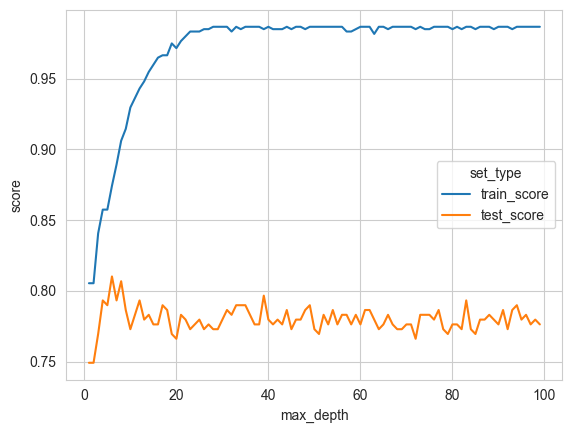

In [47]:
sns.lineplot(data=scores_data, x="max_depth", y="score", hue="set_type")

## Разделение пространства

In [48]:
import numpy as np

In [49]:
# первый класс
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

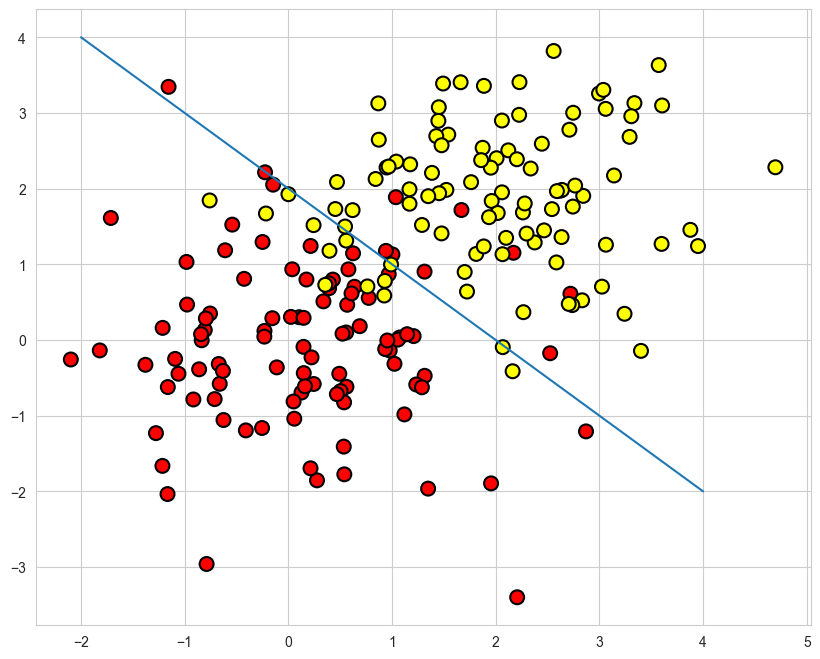

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidths=1.5
)

plt.plot(range(-2, 5), range(4, -3, -1))

In [53]:
train_data

array([[ 2.76265890e-01, -1.85462808e+00],
       [ 6.23901111e-01,  1.14531129e+00],
       [ 1.03719047e+00,  1.88663893e+00],
       [-1.11698290e-01, -3.62101338e-01],
       [ 1.48675045e-01, -4.37783153e-01],
       [ 2.17125700e+00,  1.15231025e+00],
       [-1.81881234e+00, -1.38049341e-01],
       [ 5.39839614e-01, -1.77528229e+00],
       [ 1.31487654e+00, -4.73448047e-01],
       [-1.09222990e+00, -2.50027442e-01],
       [-9.82294304e-01,  1.03126909e+00],
       [ 4.91333776e-01, -4.46646604e-01],
       [-8.06360082e-01,  1.31267758e-01],
       [-1.21256024e+00,  1.59990853e-01],
       [-7.55223036e-01,  3.49895992e-01],
       [ 9.77541764e-01, -1.38585250e-01],
       [ 1.03856305e-01,  3.00591036e-01],
       [ 9.68205296e-01,  8.69623842e-01],
       [ 5.67783089e-01,  4.65282344e-01],
       [-1.16537308e+00, -2.03599479e+00],
       [-1.15541329e+00,  3.34515739e+00],
       [ 1.26727211e-01, -6.94178896e-01],
       [ 5.57674431e-01,  9.91466000e-02],
       [ 6.

In [54]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [52]:
tree_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

In [55]:
tree_clf.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

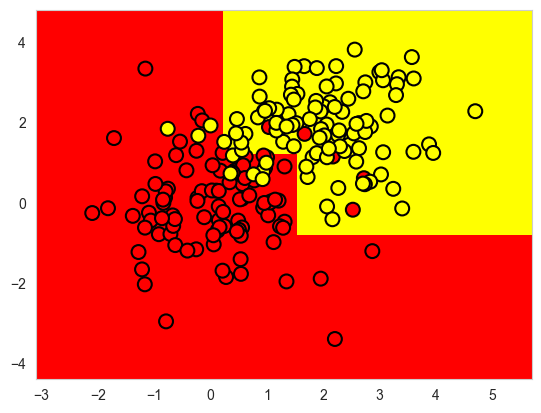

In [56]:
xx, yy = get_grid(train_data)
predicted = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidths=1.5
)